In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [4]:
df = pd.read_csv("D:\Restaurant Data Analysis Project\Dataset .csv")

print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

df.head()


Number of Rows: 9551
Number of Columns: 21


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
# Check missing values
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Fill numeric nulls with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical nulls with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df['Country Code'] = df['Country Code'].astype(str)


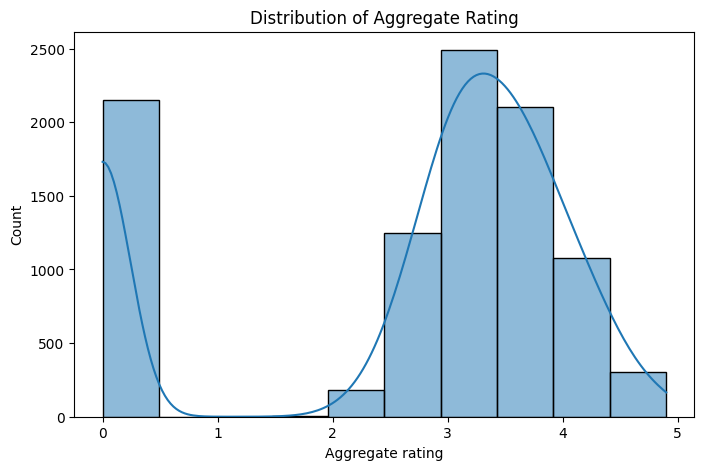

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.show()


In [10]:
df['Aggregate rating'].value_counts()


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [11]:
df.describe()


,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
df['Country Code'].value_counts().head(10)


Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

In [13]:
df['City'].value_counts().head(10)


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64

In [14]:
df['Cuisines'].value_counts().head(10)


Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

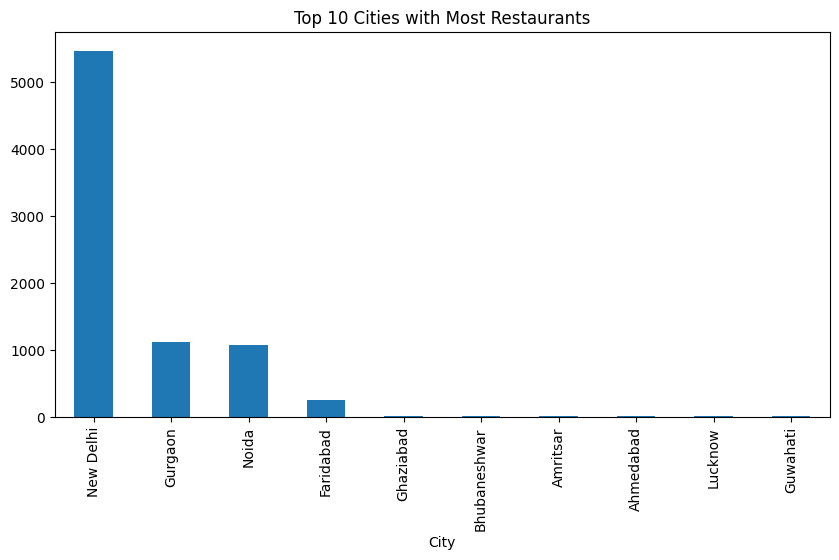

In [15]:
# Top 10 cities with most restaurants
top_cities = df['City'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_cities.plot(kind='bar')
plt.title('Top 10 Cities with Most Restaurants')
plt.show()


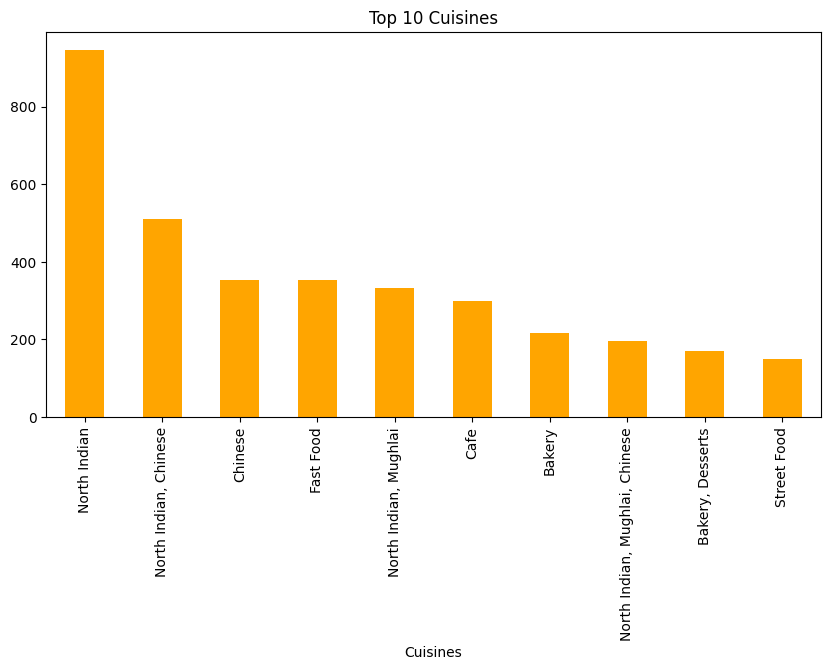

In [16]:
# Top 10 cuisines
top_cuisines = df['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_cuisines.plot(kind='bar', color='orange')
plt.title('Top 10 Cuisines')
plt.show()


In [17]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=4)

for _, row in df.sample(500).iterrows():  # sampling for performance
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='red',
        fill=True
    ).add_to(restaurant_map)

restaurant_map


In [18]:
df.groupby('City').size().sort_values(ascending=False).head(10)


City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Amritsar          21
Ahmedabad         21
Guwahati          21
dtype: int64

In [19]:
df.groupby('Country Code').size().sort_values(ascending=False)


Country Code
1      8652
216     434
215      80
189      60
214      60
30       60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
dtype: int64

In [20]:
df[['Latitude', 'Longitude', 'Aggregate rating']].corr()


,Latitude,Longitude,Aggregate rating
Latitude,1.000000,0.043207,0.000516
Longitude,0.043207,1.000000,-0.116818
Aggregate rating,0.000516,-0.116818,1.000000


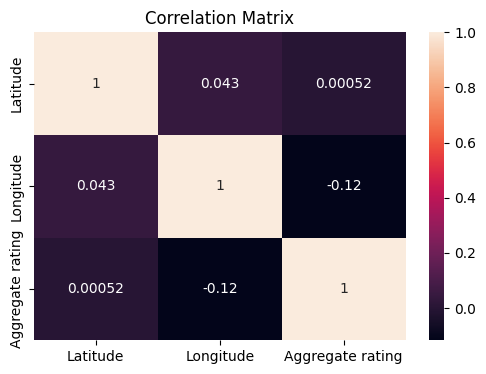

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Latitude','Longitude','Aggregate rating']].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()
